# ÌÉêÏÉâÏ†ÅÏûêÎ£åÎ∂ÑÏÑù 8Ïû• Í≥ºÏ†ú

## 202115789 ÌÜµÍ≥ÑÌïôÍ≥º ÍπÄÏßÄÏö∞

## ÏàôÏ†ú 1

### 1-1) Ïó¨Îü¨ Í∞ÄÏßÄ ÌèâÌôú Í∏∞Î≤ï(4253H, twiceit, 3RSSH, twiceit Îì±) ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌèâÌôú Ìï¥ Î≥¥Í≥† ÌÉêÏÉâÌïòÏãúÏò§

In [112]:
elec <- read.csv('Ïö©ÎèÑÎ≥Ñ_Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ_20220527214927.csv', header = TRUE)[c(-1,-2,-3), c(-1, -4)] 
colnames(elec) <- c(2013, 2014, 2016, 2017, 2018, 2019)
rownames(elec) <- 1:12
elec[,1:6] <- elec[,1:6] %>% unlist() %>% as.numeric()
elec

2013    2014    2016    2017    2018    2019   
1  4111542 4240903 4278712 4362665 4628993 4792097
2  3622215 3924659 4101465 4225253 4387240 4297030
3  3808272 4085945 4090460 4277073 4370210 4414219
4  3708180 3889221 3938652 4069577 4158537 4272633
5  3659870 3820255 3822073 3974475 4128142 4294717
6  3581181 3809582 3789423 4000824 4102184 4253487
7  3708929 3920746 4019425 4240321 4342389 4475404
8  3766940 3891818 4182948 4316873 4626019 4611353
9  3671778 3745396 3924897 4109028 4195754 4253081
10 3776176 3818065 3903213 3903712 4142501 4141846
11 3940655 3982861 4107340 4263161 4358067 4338290
12 4110670 4165510 4295324 4437240 4572671 4500697

#### 4253H, twiceÎ•º Ïù¥Ïö©Ìïú ÌèâÌôú

In [113]:
install.packages('sleekts')
library(sleekts)

Warning message:
"Ìå®ÌÇ§ÏßÄ 'sleekts'Í∞Ä ÏÇ¨Ïö©Ï§ëÏù¥ÎØÄÎ°ú ÏÑ§ÏπòÎêòÏßÄ ÏïäÏùÑ Í≤ÉÏûÖÎãàÎã§"


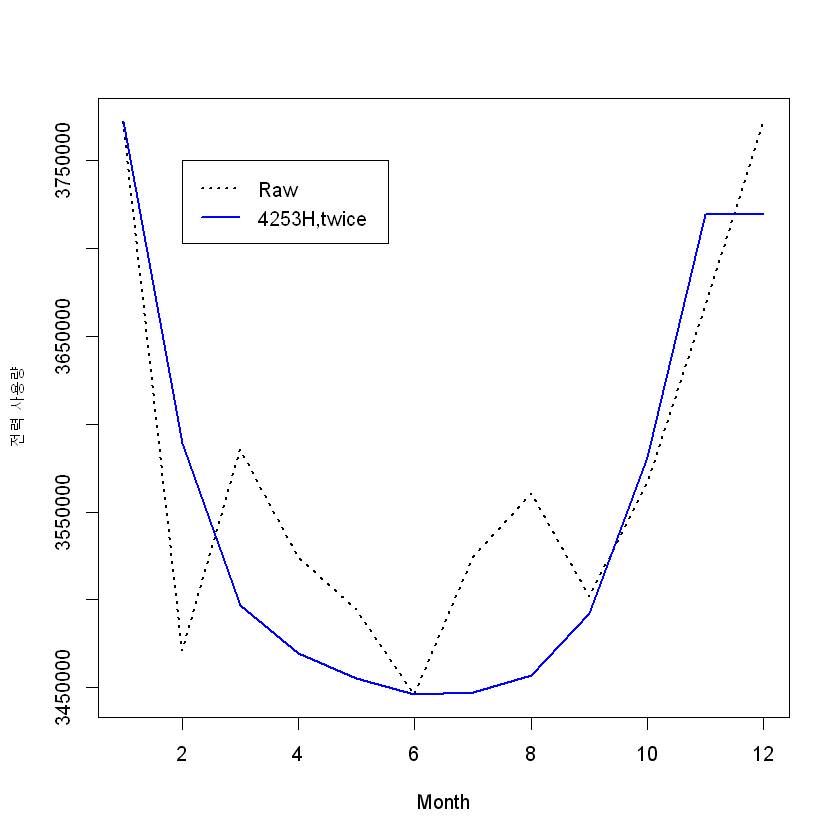

In [114]:
h4253=sleek(elec$'2013')
plot(elec$'2013',type="l",ylab="",lty="dotted",xlab="Month",lwd=2, yaxt = 'n')
par(new=T)
plot(h4253,type="l",ylab="Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ",xlab="Month", col="blue",lwd=2)
legend(x = 2, y = 3750000, c("Raw", "4253H,twice"), 
       col = c("black","blue"), 
       lty=c(3,1),lwd=2)

#### 3RSSH, twiceÎ•º Ïù¥Ïö©Ìïú ÌèâÌôú

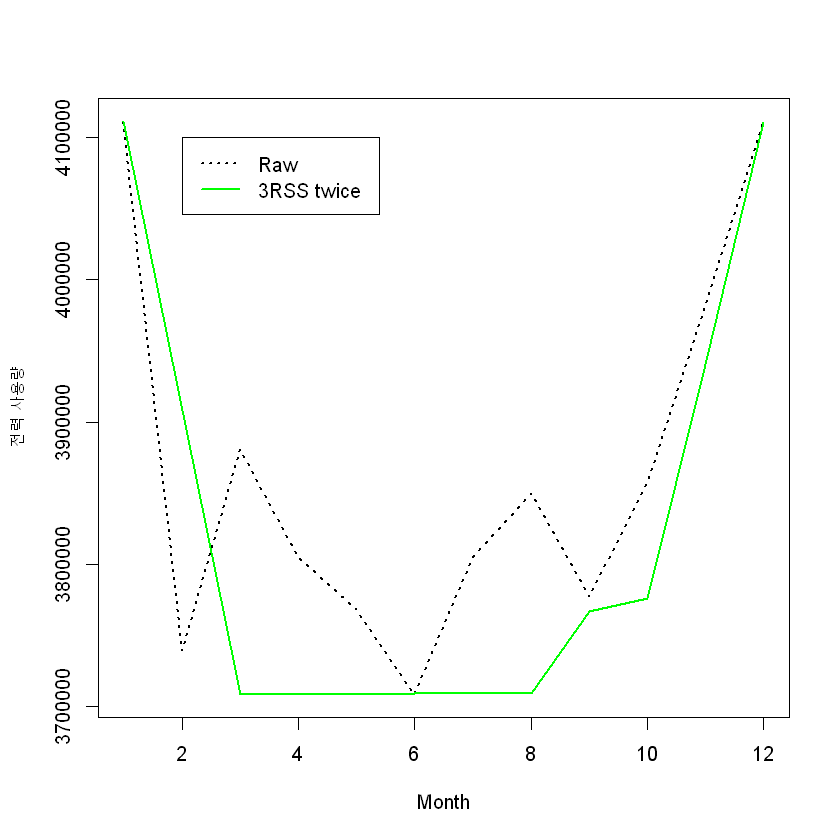

In [115]:
a3rssh2=function(x){
  n=length(x)
  x3rss=smooth(x,kind="3RSS")
  x3rssh <- vector("numeric",n)
  x3rssh2 <- vector("numeric",n)
  for (i in 2:(n-1)) x3rssh[i] <- x3rss[i-1]/4 + x3rss[i]/2 + x3rss[i+1]/4
  x3rssh[1] <- x3rss[1]; x3rssh[n] <- x3rss[n]
  rough=x-x3rssh
  
  x3rss2=smooth(rough,kind="3RSS")
  
  for (i in 2:(n-1)) x3rssh2[i] <- x3rss2[i-1]/4 + x3rss2[i]/2 + x3rss2[i+1]/4
  x3rssh2[1] <- x3rss2[1]; x3rssh2[n] <- x3rss2[n]
  end=x3rssh+x3rssh2
  return(end)
  }
ts.friday=ts(elec$'2013')
smooth.f=smooth(ts.friday,kind="3RSS",twiceit = T)
plot(elec$'2013',type="l",ylab="Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ",lty="dotted",xlab="Month",lwd=2, yaxt = 'n')
par(new=T)
plot(smooth.f,xlab="",ylab="",col="green",lwd=2) #3RSS3RSS
legend(x = 2, y = 4100000, c("Raw", "3RSS twice"), 
      col = c("black","green"),
      lty=c(3,1),lwd=2)

#### Comment

- Ïó¨Î¶ÑÏ≤†Ïùò Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÏù¥ Ï†ÅÍ≥† Í≤®Ïö∏Ï≤†Ïùò Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÏù¥ ÎÜíÎã§.

### 1-2) decompose( ) Ìï®ÏàòÎ•º Ïç®ÏÑú ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥Î•º ÌïòÍ≥† Ï∂îÏÑ∏ÏôÄ Í≤åÏ†àÏÑ±ÏùÑ ÌÉêÏÉâÌïòÏãúÏò§

In [136]:
elec

2013    2014    2016    2017    2018    2019   
1  4111542 4240903 4278712 4362665 4628993 4792097
2  3622215 3924659 4101465 4225253 4387240 4297030
3  3808272 4085945 4090460 4277073 4370210 4414219
4  3708180 3889221 3938652 4069577 4158537 4272633
5  3659870 3820255 3822073 3974475 4128142 4294717
6  3581181 3809582 3789423 4000824 4102184 4253487
7  3708929 3920746 4019425 4240321 4342389 4475404
8  3766940 3891818 4182948 4316873 4626019 4611353
9  3671778 3745396 3924897 4109028 4195754 4253081
10 3776176 3818065 3903213 3903712 4142501 4141846
11 3940655 3982861 4107340 4263161 4358067 4338290
12 4110670 4165510 4295324 4437240 4572671 4500697

In [116]:
elec_T <- t(elec)

In [150]:
log_elec_ts

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
2013 8.321553 8.352531 8.361407 8.380838 8.440095 8.474723 8.194841 8.275035
2014 8.244931 8.315308 8.316413 8.361024 8.382566 8.392586 8.218296 8.265964
2015 8.205183 8.248072 8.248548 8.287648 8.325583 8.365141 8.183448 8.245275
2016 8.218498 8.274037 8.298894 8.352394 8.376180 8.406352 8.234018 8.266632
2017 8.208431 8.228283 8.275095 8.320942 8.341828 8.355399 8.236467 8.247499
2018 8.279102 8.289756 8.320531 8.357766 8.379784 8.375236 8.321341 8.334594
     Sep      Oct      Nov      Dec     
2013 8.319100 8.348834 8.386456 8.365679
2014 8.278594 8.311294 8.332919 8.359986
2015 8.239969 8.294256 8.319275 8.355494
2016 8.338772 8.370287 8.439452 8.436277
2017 8.269555 8.269683 8.329055 8.328897
2018 8.365282 8.397788 8.427853 8.411988

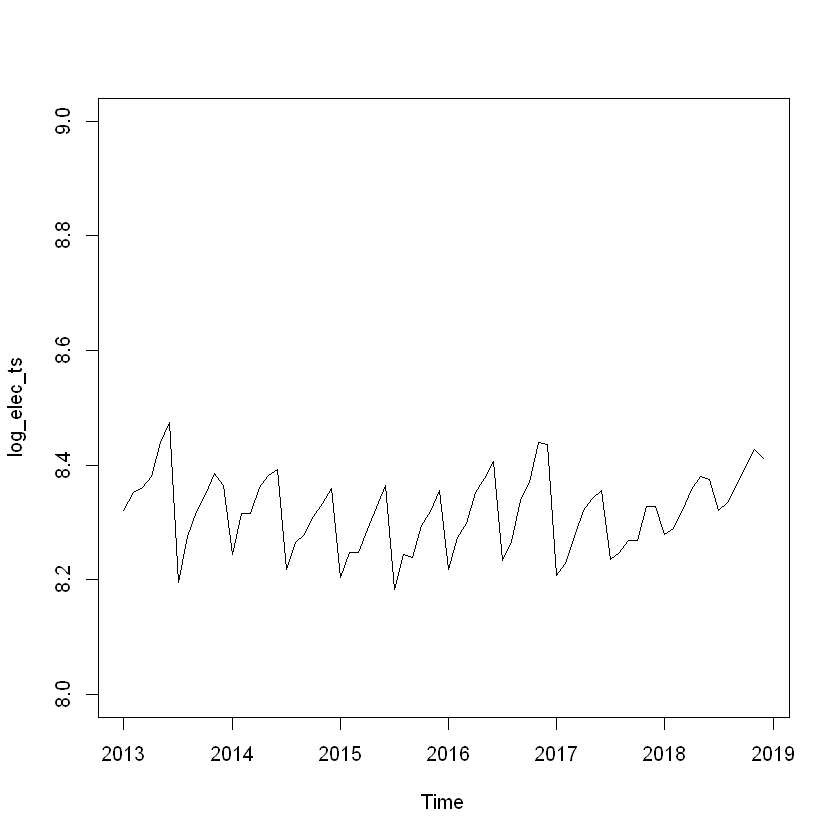

In [159]:
kk <- elec_T %>% unlist %>% as.numeric()
elec_ts <- ts(kk/1000, start = c(2013, 1), frequency = 12)
log_elec_ts <- log(elec_ts)
plot(log_elec_ts, ylim = c(8,9))

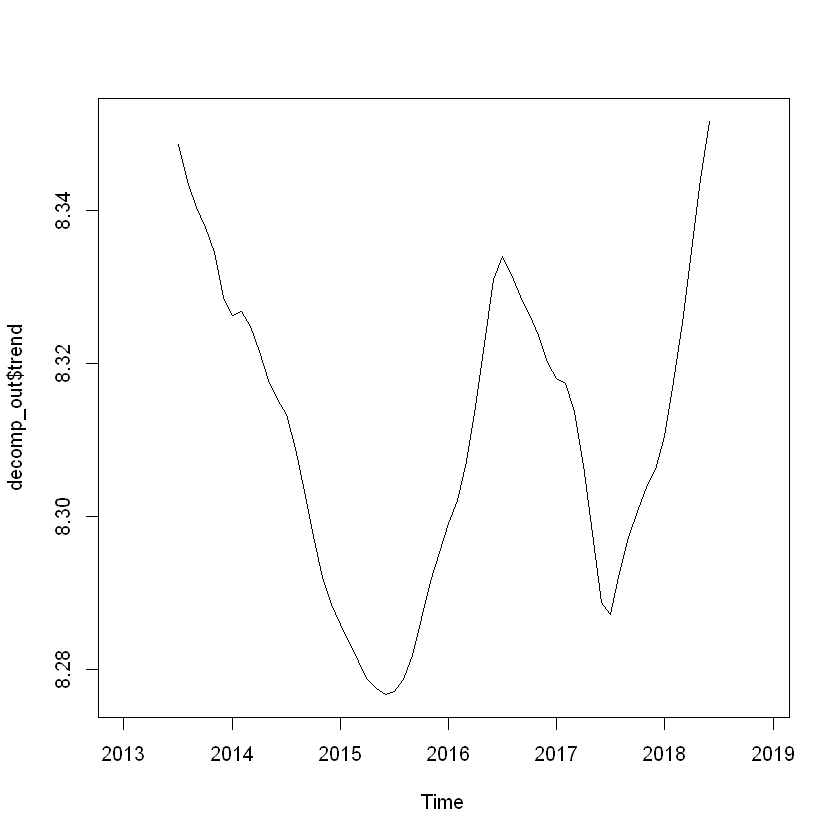

In [164]:
decomp_out <- decompose(log_elec_ts)
plot(decomp_out$trend)

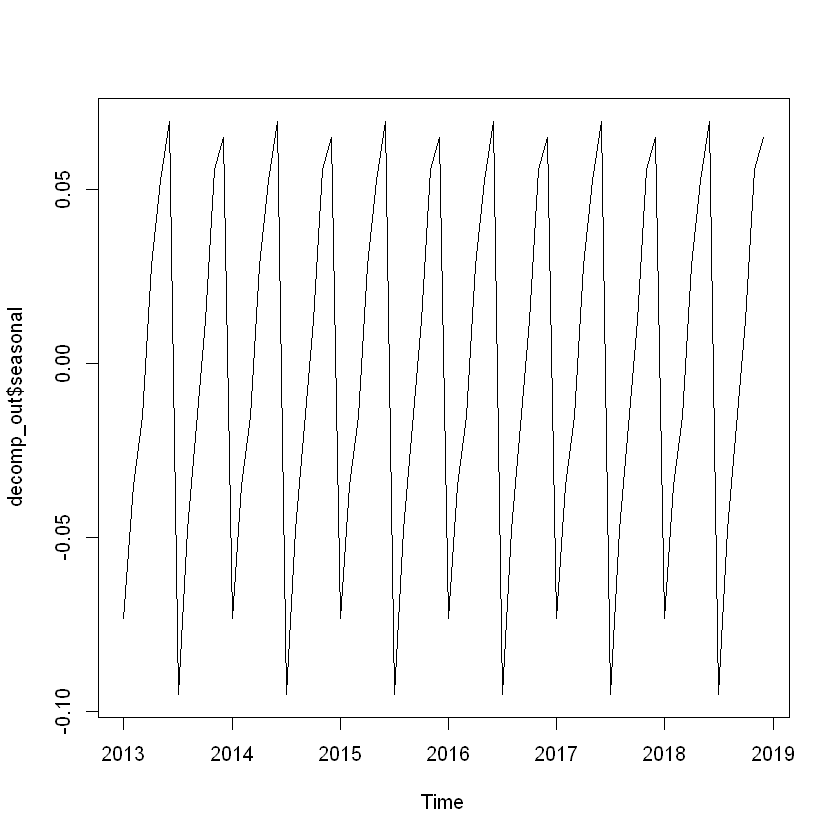

In [161]:
plot(decomp_out$seasonal)

#### Comment

- Í≥ÑÏ†àÏÑ±Ïù¥ ÎëêÎìúÎü¨ÏßÑÎã§.

### 1-3) ACFÎ•º Í∑∏Î¶¨Í≥† ÌÉêÏÉâÌï¥ Î≥¥ÏãúÏò§

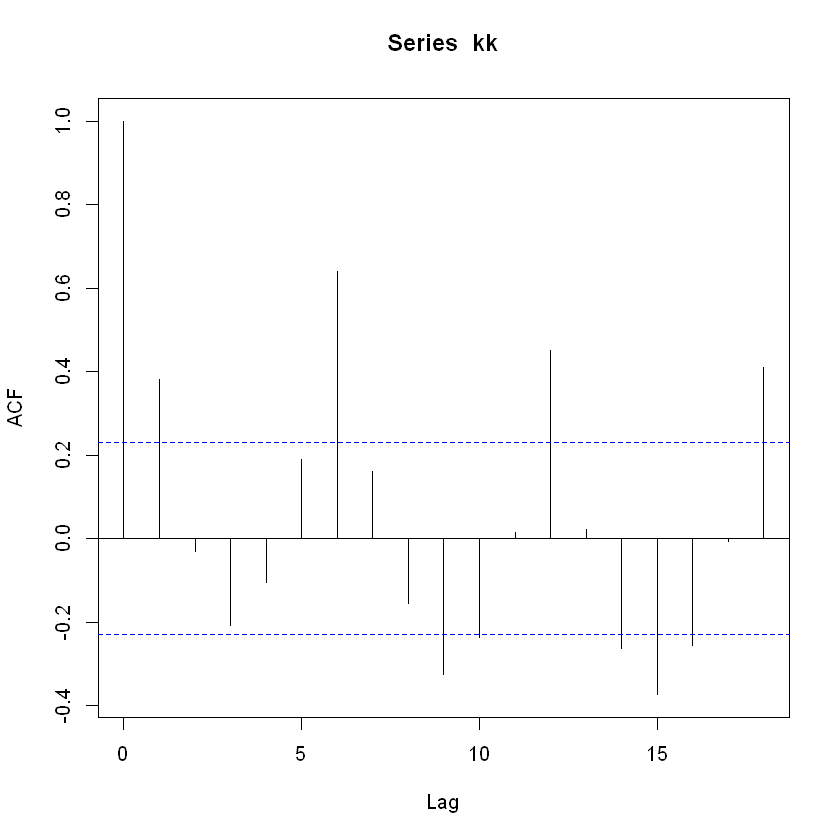

In [171]:
acf(kk)

- ÏñëÍ≥º ÏùåÏùÑ Î∞òÎ≥µÌï®Ïóê ÏûàÏñ¥ Ïñ¥ÎäêÏ†ïÎèÑ Ï£ºÍ∏∞ÏÑ±Ïù¥ Ï°¥Ïû¨ÌïòÎäîÎç∞ Ïù¥Îäî Í≥ÑÏ†àÏóê Îî∞Îùº Ï†ÑÎ†• ÏÇ¨Ïö©ÎüâÏù¥ Îã§Î¶ÑÏùÑ ÎßêÌïúÎã§.

## ÏàôÏ†ú 2

### 2-1) Ïó¨Îü¨ Í∞ÄÏßÄ ÌèâÌôú Í∏∞Î≤ï(4253H, twiceit, 3RSSH, twiceit Îì±) ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÌèâÌôú Ìï¥ Î≥¥Í≥† ÌÉêÏÉâÌïòÏãúÏò§

In [181]:
rice <- read.csv('ÎÜçÏóÖÏÉùÏÇ∞Îüâ_ÏåÄ__20220524102135.csv', header = TRUE)
colnames(rice) <- c('Ïó∞ÎèÑ', 'ÏÉùÏÇ∞Îüâ')
head(rice)

Ïó∞ÎèÑ ÏÉùÏÇ∞Îüâ 
1 1980 5311406
2 1981 7148703
3 1982 7307855
4 1983 7607541
5 1984 7970330
6 1985 7855262

#### 4253H, twiceitÎ•º Ïù¥Ïö©Ìïú ÌèâÌôú

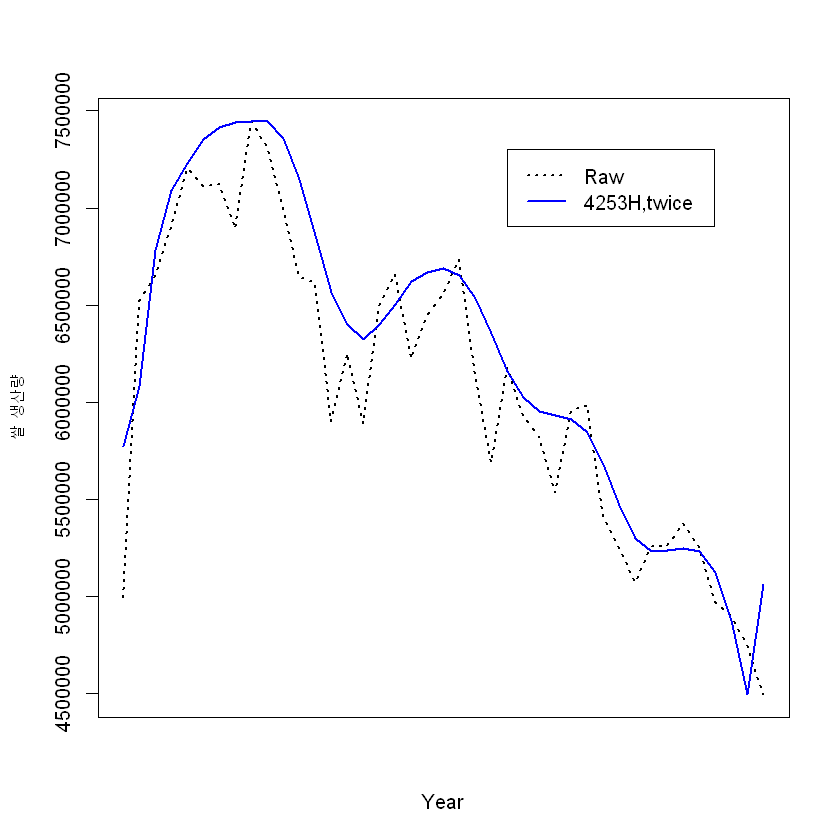

In [198]:
h4253=sleek(rice$'ÏÉùÏÇ∞Îüâ')
plot(rice$'ÏÉùÏÇ∞Îüâ',type="l",ylab="",lty="dotted",xlab="",lwd=2, yaxt = 'n', xaxt = 'n')
par(new=T)
plot(h4253,type="l",ylab="ÏåÄ ÏÉùÏÇ∞Îüâ",xlab="Year", col="blue",lwd=2, xaxt = 'n')
legend(x = 25, y = 7300000, c("Raw", "4253H,twice"), 
       col = c("black","blue"), 
       lty=c(3,1),lwd=2)

#### 3RSSH, twiceÎ•º Ïù¥Ïö©Ìïú ÌèâÌôú

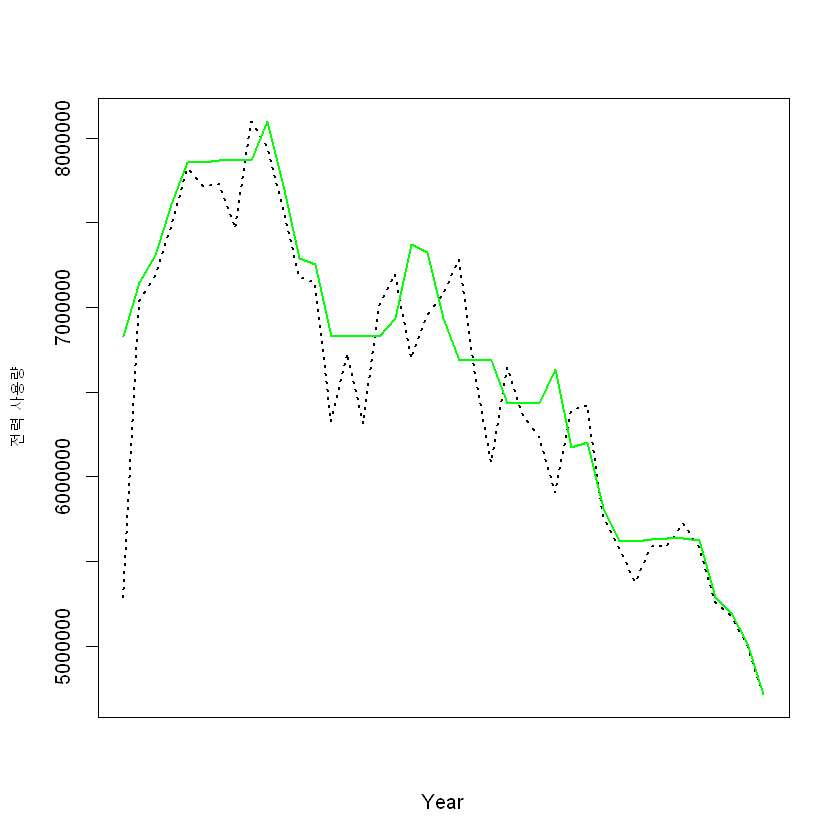

In [199]:
ts.friday=ts(rice$'ÏÉùÏÇ∞Îüâ')
smooth.f=smooth(ts.friday,kind="3RSS",twiceit = T)
plot(rice$'ÏÉùÏÇ∞Îüâ',type="l",ylab="Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ",lty="dotted",xlab="Year",lwd=2, yaxt = 'n', xaxt = 'n')
par(new=T)
plot(smooth.f,xlab="",ylab="",col="green",lwd=2, xaxt = 'n') #3RSS3RSS
legend(x = 2, y = 4100000, c("Raw", "3RSS twice"), 
      col = c("black","green"),
      lty=c(3,1),lwd=2)

#### Comment

- ÏµúÍ∑ºÎì§Ïñ¥ ÏåÄ ÏÉùÏÇ∞ÎüâÏù¥ Í∏àÍ∞êÌïòÍ≥† ÏûàÎã§.

### 2-2) decompose( ) Ìï®ÏàòÎ•º Ïç®ÏÑú ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥Î•º ÌïòÍ≥† Ï∂îÏÑ∏ÏôÄ Í≤åÏ†àÏÑ±ÏùÑ ÌÉêÏÉâÌïòÏãúÏò§

- ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥Í∞Ä Î∂àÍ∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞Ïù¥Îã§.

## ÏàôÏ†ú 3

### 3-1) ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ ÏûêÍ∏∞ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÎπÑÍµê ÏÑ§Î™ÖÌïòÏãúÏò§.

ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ ÏûêÍ∏∞ÏÉÅÍ¥ÄÍ≥ÑÏàòÏùò Ïú†ÏÇ¨Ìïú¬†Ï†êÏùÄ Îëê Ïó∞ÏÜçÌòï Î≥ÄÏàò Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌïòÎã§Îäî Ï†êÏûÖÎãàÎã§. Í∏∞Î≥∏ Í∞úÎÖêÏùÄ Í≥µÎ∂ÑÏÇ∞ÏùÑ ÌëúÏ§ÄÌé∏Ï∞®Î°ú ÎÇòÎàÑÏñ¥ÏÑú ÌëúÏ§ÄÌôîÌï¥Ï£ºÎ©∞, -1 ~ 1 ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßÄÍ≤å Îê©ÎãàÎã§.¬†

ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ ÏûêÍ∏∞ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÏÑúÎ°ú Îã§Î•∏ Ï†êÏùÄ, ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî ÌäπÏ†ï ÎèôÏùº ÏãúÏ†êÏùÑ Ìö°Îã®Î©¥ÏúºÎ°ú Ìï¥ÏÑú YÏôÄ Îã§Î•∏ X1, X2, ... Î≥ÄÏàòÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï©ÎãàÎã§. Î∞òÎ©¥Ïóê ÏûêÍ∏∞ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî¬†ÎèôÏùºÌïú Î≥ÄÏàò(Yt, Yt-1, Yt-2, ...)Ïùò ÏÑúÎ°ú Îã§Î•∏ ÏãúÍ∞Ñ Ï∞®Ïù¥Î•º ÎëêÍ≥† Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌïòÎäî Í≤ÉÏûÖÎãàÎã§.¬†

### 3-2-1) ùë°=1,2,‚ãØ,50,  ÏóêÏÑú ùë¶_ùë°=ùë†ùëñùëõùëí(2ùë°)+ùëõùëúùëñùë†ùëí,  ùëõùëúùëñùëêùëí~ùëÅ(0,1)Ïù¥Îùº Ìï† Îïå ùë¶_ùë° Î•º Í∑∏Î¶¨Í≥† ÌÉêÏÉâÌïòÏãúÏò§.

In [236]:
t <- 1:50
noise <- rnorm(50, 0, 1)
y_t <- sin(2*t) + noise

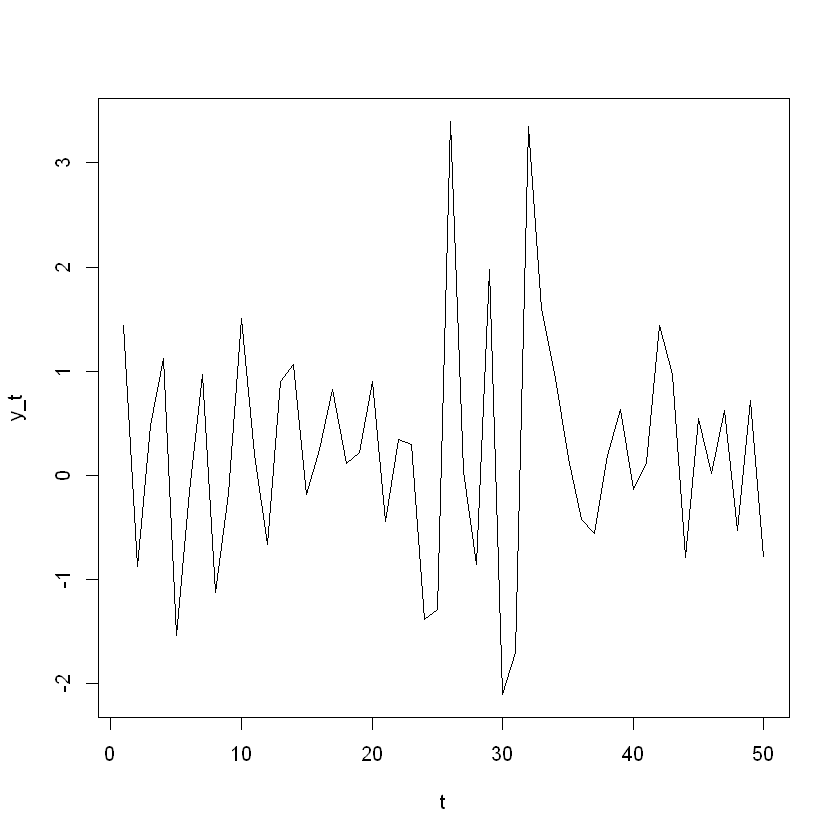

In [237]:
plot(t, y_t, type = 'l')

### 3-2-2) ACFÎ•º Í∑∏Î¶¨Í≥† ÌÉêÏÉâÌïòÏãúÏò§.

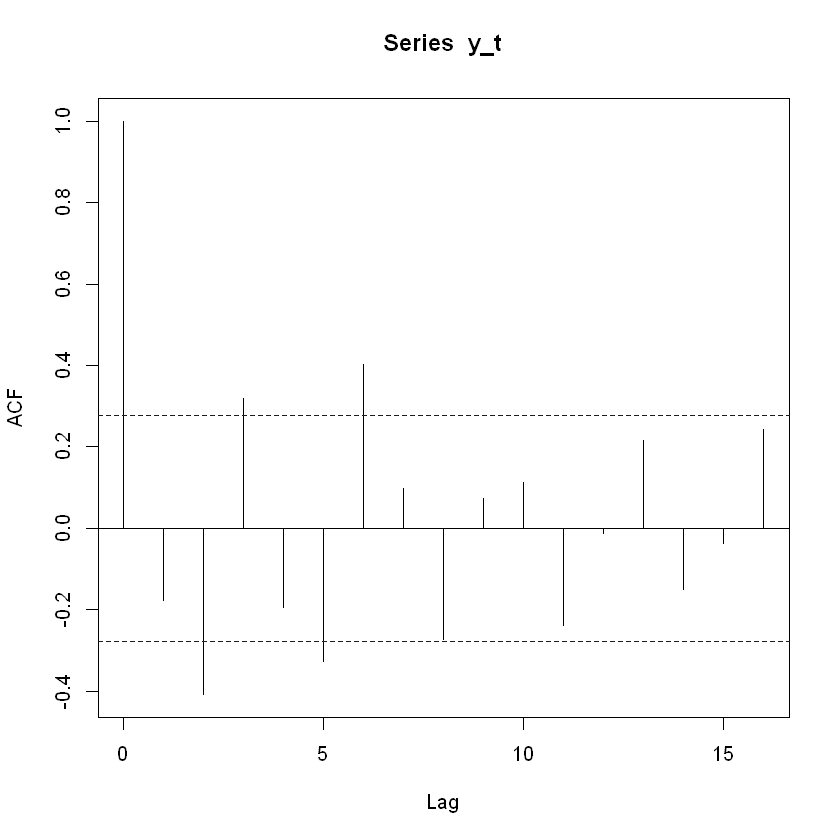

In [238]:
acf(y_t)

- Î≥ÑÎã§Î•∏ Ìå®ÌÑ¥Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.